## Diffusion in 2D

### The Diffusion Equation in 2D

\begin{equation}
\frac{\partial u}{\partial t} - \nu \frac{\partial^2 u}{\partial x^2} - \nu \frac{\partial^2 u}{\partial y^2} = 0
\end{equation}

where $\nu$ is the viscosity.  As before, we use the forward difference for the time derivative, and the central difference approximation for the second order spatial derivatives. 

\begin{equation}
\frac{u_{ij}^{n+1} -  u_{ij}^n}{\Delta t} - \nu \left( \frac{u^n_{(i+1)j} - 2 u^n_{ij} + u^n_{(i-1)j}}{\Delta x^2} \right) - \nu \left( \frac{u^n_{i(j+1)} - 2 u^n_{ij} + u^n_{i(j-1)}}{\Delta y^2} \right) = 0
\end{equation}

\begin{equation}
u_{ij}^{n+1} =  u_{ij}^n + \frac{\nu \Delta t}{\Delta x^2} \left( u^n_{(i+1)j} - 2 u^n_{ij} + u^n_{(i-1)j} \right) + \frac{\nu \Delta t}{\Delta y^2} \left( u^n_{i(j+1)} - 2 u^n_{ij} + u^n_{i(j-1)} \right)
\end{equation}

In [1]:
# Remember: comments in python are denoted by the pound sign
import numpy as np                            #here we load numpy
from matplotlib import pyplot as plt     #here we load matplotlib
from matplotlib import cm as cm     #here we load matplotlib
import time, sys                         #and load some utilities

In [2]:
#this makes matplotlib plots appear in the notebook (instead of a separate window)
%matplotlib inline                  

In [3]:
# We define the x-axis to start at x=0.0m and end at x=2.0m.
# We define the y-axis to start at y=0.0m and end at y=2.0m.
# 
# We specify the number of steps in x (nx), the number of steps
# in y (ny), and the number
# of steps in t (nt), and calculate dx, dy, and dt based on these choices.

xrange = 2.0
yrange = 2.0
nx = 31
ny = 31
nt = 17

dx = xrange / (nx-1)
dy = yrange / (ny-1)
viscosity = 0.05

sigma = .25
dt = sigma * dx * dy / viscosity
trange = dt*(nt-1)

x = np.linspace(0,xrange,nx)
y = np.linspace(0,yrange,ny)

In [4]:
# Set the wavefunction equal to all ones, initially
u = np.ones((nx,ny))      #numpy function ones()
u[int(0.5 / dx):int(1.0 / dx + 1),int(0.5 / dy):int(1.0 / dy + 1)] = 2  #setting u = 2 between 0.5 and 1

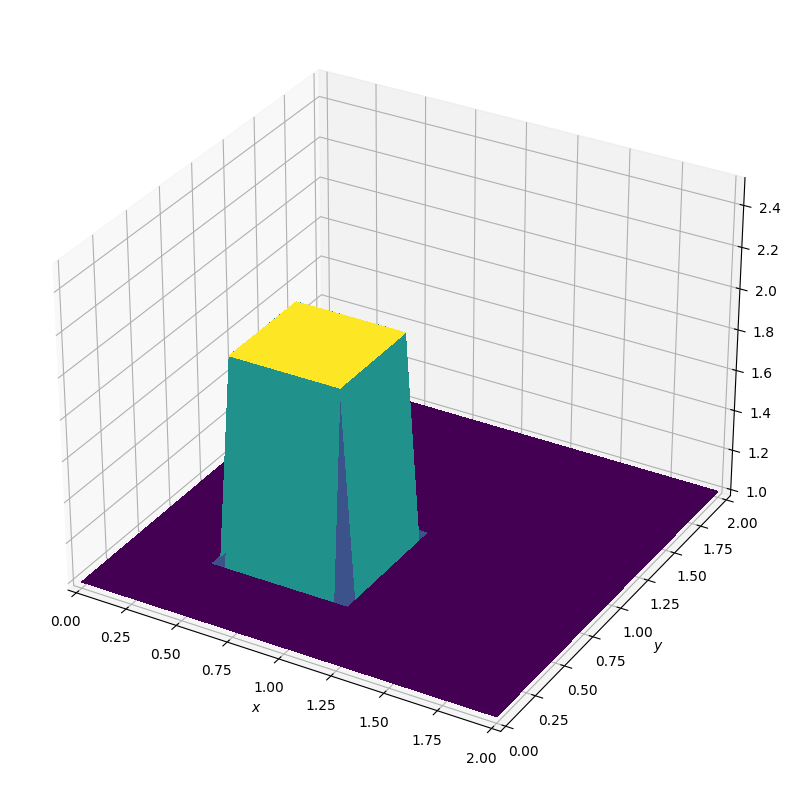

In [5]:
fig = plt.figure(figsize=(15, 10), dpi=100)
ax = fig.add_subplot(111,projection='3d')
X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=False)

ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_zlim(1, 2.5)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

In [6]:
###Run through nt timesteps
def diffuse(nt):
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2  
    
    for n in range(nt + 1): 
        un = u.copy()
        u[1:-1, 1:-1] = (un[1:-1,1:-1] + 
                        viscosity * dt / dx**2 * 
                        (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                        viscosity * dt / dy**2 * 
                        (un[2:,1: -1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1

    
    fig = plt.figure(figsize=(15, 10), dpi=100)
    ax = fig.add_subplot(111,projection='3d')
    surf = ax.plot_surface(X, Y, u[:], rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=True)
    ax.set_zlim(1, 2.5)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$');
    

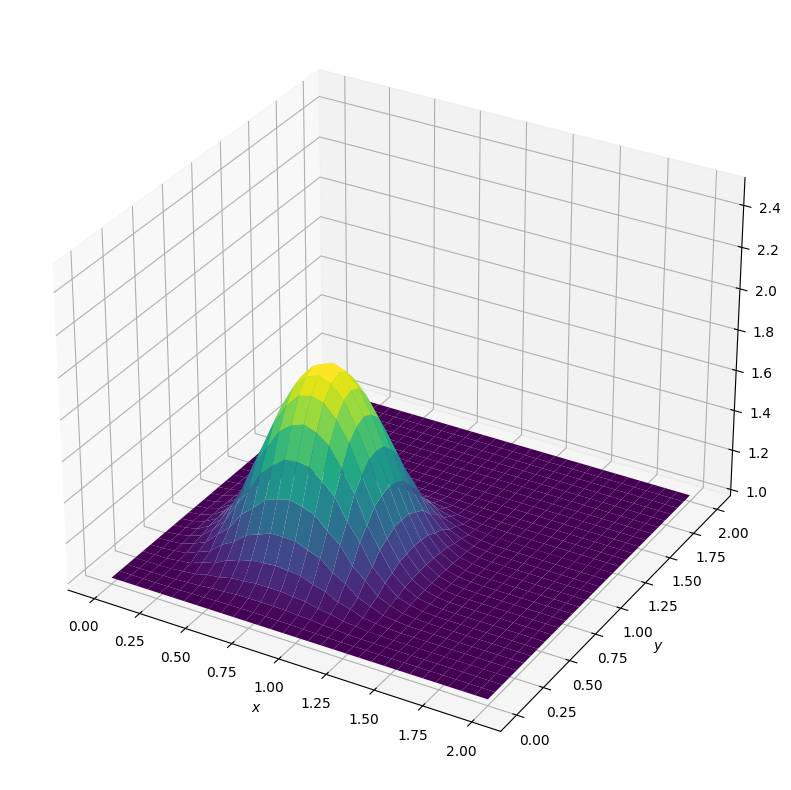

In [7]:
diffuse(10)

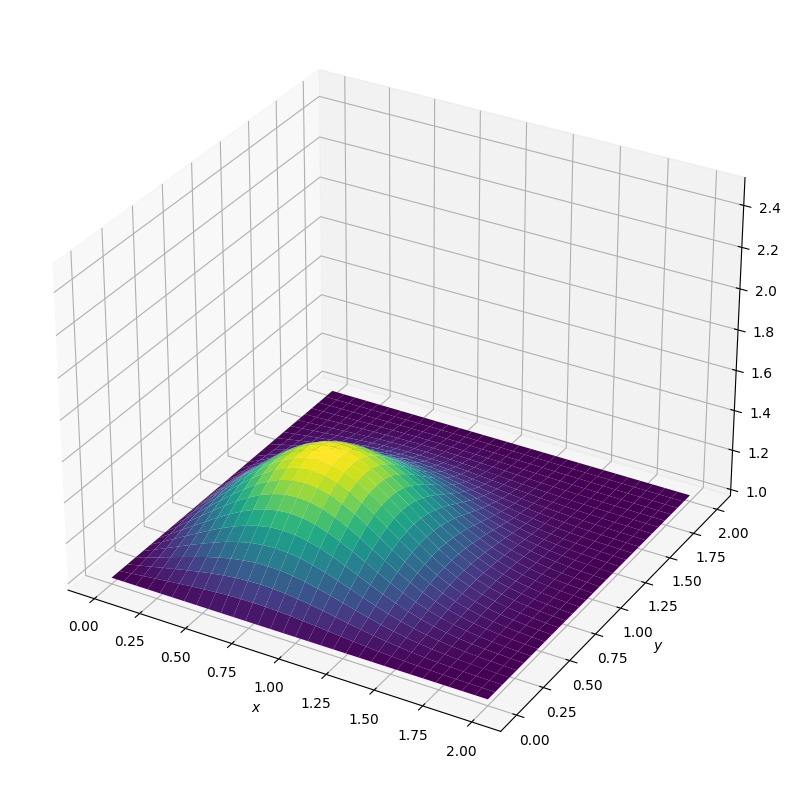

In [8]:
diffuse(50)